In [13]:
import numpy as np  # For numerical operations
import pandas as pd  # For working with tabular data
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For data visualization

In [14]:
# Load the dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)

In [15]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [16]:
print('Shape:', df.shape)

Shape: (9704, 11)


In [17]:
# Select only the required columns

cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


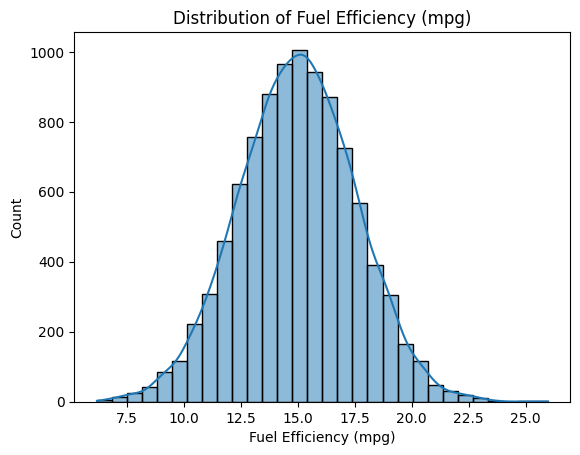

In [18]:
sns.histplot(df['fuel_efficiency_mpg'], bins=30, kde=True)
plt.title('Distribution of Fuel Efficiency (mpg)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.show()

In [19]:
# QUESTION 1

print(df.info())  # Shows data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB
None


In [20]:
# Shows how many missing values in each column

print(df.isnull().sum())  

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [21]:
# Identify the column with missing values

missing_counts = df.isnull().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])

Columns with missing values:
 horsepower    708
dtype: int64


In [22]:
# QUESTION 2

# Calculate the median (50th percentile) of horsepower
median_hp = df['horsepower'].median()
print("Median horsepower:", median_hp)

Median horsepower: 149.0


In [23]:
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split sizes
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

# Split
train_df = df.iloc[:n_train].reset_index(drop=True)
val_df = df.iloc[n_train:n_train + n_val].reset_index(drop=True)
test_df = df.iloc[n_train + n_val:].reset_index(drop=True)

print(train_df.shape, val_df.shape, test_df.shape)

(5822, 5) (1940, 5) (1942, 5)


In [24]:
# Shuffle the dataset (seed 42)
n = len(df)
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)
df_shuffled.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,270,113.0,2952.280077,2020,14.748943
1,170,173.0,3527.098893,2016,11.437054
2,50,126.0,2697.391830,2006,15.549220
3,160,163.0,3380.841546,2008,13.832357
4,140,114.0,3254.486759,2009,13.259445


In [25]:
# QUESTION 3

from numpy.linalg import inv
import numpy as np

# Prepare the feature matrix (adds bias column)
def prepare_X(df, features):
    X = df[features].values
    return np.column_stack([np.ones(X.shape[0]), X])

# Train linear regression using the normal equation
def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Function to fill missing values and train/evaluate the model
def fill_and_train(fill_value):
    train_filled = train_df.copy()
    val_filled = val_df.copy()
    col = 'horsepower'  # Column with missing values

    # Fill missing values
    if fill_value == 'mean':
        mean_val = train_filled[col].mean()
        train_filled[col] = train_filled[col].fillna(mean_val)
        val_filled[col] = val_filled[col].fillna(mean_val)
    else:
        train_filled[col] = train_filled[col].fillna(0)
        val_filled[col] = val_filled[col].fillna(0)

    # Prepare features and target
    X_train = prepare_X(train_filled, features)
    y_train = train_filled['fuel_efficiency_mpg'].values
    X_val = prepare_X(val_filled, features)
    y_val = val_filled['fuel_efficiency_mpg'].values

    # Train model and predict
    w = train_linear_regression(X_train, y_train)
    y_pred = X_val.dot(w)
    score = rmse(y_val, y_pred)
    return round(score, 2)

# Calculate RMSE for both filling strategies
rmse_zero = fill_and_train(0)
rmse_mean = fill_and_train('mean')

print(f"RMSE with 0 fill: {rmse_zero}")
print(f"RMSE with mean fill: {rmse_mean}")

if rmse_zero < rmse_mean:
    print("Filling missing values with 0 gives a lower RMSE.")
elif rmse_mean < rmse_zero:
    print("Filling missing values with the mean yields a lower RMSE.")
else:
    print("Both strategies yield the same RMSE.")

RMSE with 0 fill: 0.52
RMSE with mean fill: 0.46
Filling missing values with the mean yields a lower RMSE.


In [26]:
# QUESTION 4

from numpy.linalg import inv
import numpy as np

# Fill missing values with 0 for train and validation sets
train_filled = train_df.copy()
val_filled = val_df.copy()
col = 'horsepower'
train_filled[col] = train_filled[col].fillna(0)
val_filled[col] = val_filled[col].fillna(0)

# Prepare feature matrices and target vectors
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
X_train = prepare_X(train_filled, features)
y_train = train_filled['fuel_efficiency_mpg'].values
X_val = prepare_X(val_filled, features)
y_val = val_filled['fuel_efficiency_mpg'].values

# List of regularization parameters to try
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

best_rmse = None
best_r = None

print("Regularization results:")
for r in r_list:
    # Compute X^T X and add regularization (skip regularizing the bias term)
    XTX = X_train.T.dot(X_train)
    I = np.eye(XTX.shape[0])
    I[0, 0] = 0  # no regularization for bias term
    XTX_reg = XTX + r * I

    # Train model using the normal equation
    w = inv(XTX_reg).dot(X_train.T).dot(y_train)

    # Predict on the validation set and compute RMSE
    y_pred = X_val.dot(w)
    current_rmse = round(rmse(y_val, y_pred), 2)
    print(f"r = {r}, RMSE = {current_rmse}")

    # Determine the best r value based on RMSE
    if best_rmse is None or current_rmse < best_rmse:
        best_rmse = current_rmse
        best_r = r

print(f"\nThe best r is {best_r} with RMSE = {best_rmse}.")

Regularization results:
r = 0, RMSE = 0.52
r = 0.01, RMSE = 0.52
r = 0.1, RMSE = 0.52
r = 1, RMSE = 0.52
r = 5, RMSE = 0.52
r = 10, RMSE = 0.52
r = 100, RMSE = 0.52

The best r is 0 with RMSE = 0.52.


In [27]:
# QUESTION 5

from numpy.linalg import inv
import numpy as np

# Helper functions (reuse from previous steps)
def prepare_X(df, features):
    X = df[features].values
    return np.column_stack([np.ones(X.shape[0]), X])

def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Try different seeds, perform splitting, training and evaluation to collect RMSE scores.
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

n = len(df)
for seed in seeds:
    # Shuffle the DataFrame using a random seed
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    
    train_split = df_shuffled.iloc[:n_train].reset_index(drop=True)
    val_split = df_shuffled.iloc[n_train:n_train+n_val].reset_index(drop=True)
    
    # Fill missing values with 0 for 'horsepower'
    train_filled = train_split.copy()
    val_filled = val_split.copy()
    train_filled['horsepower'] = train_filled['horsepower'].fillna(0)
    val_filled['horsepower'] = val_filled['horsepower'].fillna(0)
    
    # Prepare features and target vectors
    X_train = prepare_X(train_filled, features)
    y_train = train_filled['fuel_efficiency_mpg'].values
    X_val = prepare_X(val_filled, features)
    y_val = val_filled['fuel_efficiency_mpg'].values
    
    # Train model without regularization
    w = train_linear_regression(X_train, y_train)
    
    # Predict on the validation set and compute RMSE
    y_pred = X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

std = round(np.std(rmse_scores), 3)
print("Standard deviation of RMSE scores:", std)

Standard deviation of RMSE scores: 0.008


In [28]:
# Assumes: df already loaded; prepare_X, rmse defined; and
# features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
from numpy.linalg import inv
import numpy as np

# 1) Shuffle with seed 9 and split 60/20/20
df_shuffled = df.sample(frac=1, random_state=9).reset_index(drop=True)
n = len(df_shuffled)
n_train = int(n * 0.6)
n_val = int(n * 0.2)

train_val_df = df_shuffled.iloc[:n_train + n_val].reset_index(drop=True)
test_df = df_shuffled.iloc[n_train + n_val:].reset_index(drop=True)

# 2) Fill missing horsepower with 0 in both sets
col = 'horsepower'
train_val_filled = train_val_df.copy()
test_filled = test_df.copy()
train_val_filled[col] = train_val_filled[col].fillna(0)
test_filled[col] = test_filled[col].fillna(0)

# 3) Prepare matrices
X_train_val = prepare_X(train_val_filled, features)
y_train_val = train_val_filled['fuel_efficiency_mpg'].values
X_test = prepare_X(test_filled, features)
y_test = test_filled['fuel_efficiency_mpg'].values

# 4) Ridge with r=0.001, no reg on bias
r = 0.001
XTX = X_train_val.T.dot(X_train_val)
I = np.eye(XTX.shape[0])
I[0, 0] = 0
XTX_reg = XTX + r * I
w = inv(XTX_reg).dot(X_train_val.T).dot(y_train_val)

# 5) Evaluate on test
y_pred_test = X_test.dot(w)
test_rmse = rmse(y_test, y_pred_test)
print('Test RMSE:', round(test_rmse, 3))


Test RMSE: 0.529
